In [1]:
from qiskit import Aer, transpile
from qiskit.utils import QuantumInstance, algorithm_globals
from qiskit.algorithms import QAOA
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit_optimization.converters import QuadraticProgramToQubo
from qiskit_optimization.applications import Tsp
from qiskit.algorithms.optimizers import COBYLA
from qiskit.providers.aer import AerSimulator
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

C:\Users\soumy\AppData\Local\Temp\ipykernel_21804\1405514044.py:3: DeprecationWarning: ``qiskit.algorithms`` has been migrated to an independent package: https://github.com/qiskit-community/qiskit-algorithms. The ``qiskit.algorithms`` import path is deprecated as of qiskit-terra 0.25.0 and will be removed no earlier than 3 months after the release date. Please run ``pip install qiskit_algorithms`` and use ``import qiskit_algorithms`` instead.
  from qiskit.algorithms import QAOA


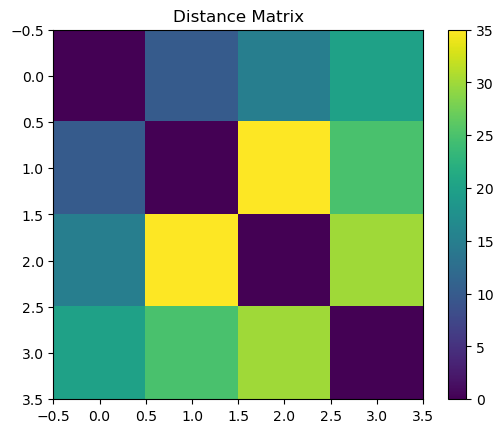

In [2]:
# Set random seed for reproducibility
algorithm_globals.random_seed = 123

# Define the distances between cities
num_cities = 4
distances = np.array([[0, 10, 15, 20],
                      [10, 0, 35, 25],
                      [15, 35, 0, 30],
                      [20, 25, 30, 0]])

# Visualize the distance matrix
plt.imshow(distances, cmap='viridis')
plt.colorbar()
plt.title("Distance Matrix")
plt.show()

In [3]:
# Create a TSP instance
tsp = Tsp(distances)
quadratic_program = tsp.to_quadratic_program()

# Convert the TSP problem to a QUBO problem
qubo = QuadraticProgramToQubo().convert(quadratic_program)

In [4]:
# Set up the Quantum Instance with the simulator backend
quantum_instance = QuantumInstance(Aer.get_backend('qasm_simulator'), seed_simulator=algorithm_globals.random_seed, seed_transpiler=algorithm_globals.random_seed)

# Use QAOA to solve the QUBO problem
qaoa = QAOA(optimizer=COBYLA(), reps=3, quantum_instance=quantum_instance)
qaoa_solver = MinimumEigenOptimizer(qaoa)
result = qaoa_solver.solve(qubo)

# Print the results
print(f"Optimal value: {result.fval}")
print(f"Optimal solution: {result.x}")

C:\Users\soumy\AppData\Local\Temp\ipykernel_21804\909113861.py:2: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  quantum_instance = QuantumInstance(Aer.get_backend('qasm_simulator'), seed_simulator=algorithm_globals.random_seed, seed_transpiler=algorithm_globals.random_seed)
C:\Users\soumy\AppData\Local\Temp\ipykernel_21804\909113861.py:5: DeprecationWarning: The class ``qiskit.algorithms.minimum_eigen_solvers.qaoa.QAOA`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. Instead, use the class ``qiskit.algorithms.minimum_eigensolvers.QAOA``. See https://qisk.it/algo_migration for a migration guide.
  qaoa = QAOA(optimizer=COBYLA(), reps=3, quantum_instance=quantum_instance)


Optimal value: 80.0
Optimal solution: [0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0.]


In [5]:
# Extract the solution
solution = result.x.reshape(num_cities, num_cities)
path = []
for i in range(num_cities):
    for j in range(num_cities):
        if solution[i][j] == 1:
            path.append((i, j))

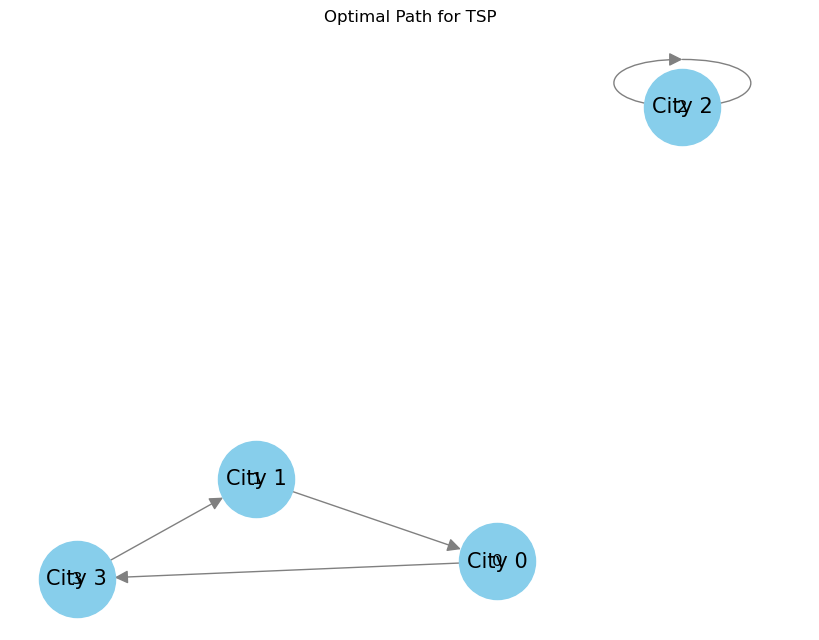

In [6]:
# Visualize the optimal path
G = nx.DiGraph()
G.add_edges_from(path)
pos = nx.spring_layout(G)
labels = {i: f"City {i}" for i in range(num_cities)}

plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=3000, edge_color='gray', arrowsize=20)
nx.draw_networkx_labels(G, pos, labels, font_size=15)
plt.title("Optimal Path for TSP")
plt.show()